In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Student_performance_data _.csv")

In [3]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


# EDA

## Undestranding data

### Check null data

In [4]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

### Check data type


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [30]:
df.describe()[['GradeClass','Absences','GPA']]

,GradeClass,Absences,GPA
count,2392.000000,2392.000000,2392.000000
mean,2.983696,14.541388,1.906186
std,1.233908,8.467417,0.915156
min,0.000000,0.000000,0.000000
25%,2.000000,7.000000,1.174803
50%,4.000000,15.000000,1.893393
75%,4.000000,22.000000,2.622216
max,4.000000,29.000000,4.000000


Most type data is int64, but not necessarily is awalays numerical maybe categorical like:
* range age
* Gender (with numerical lime 0/1)

# Feature Selection

## Using Selection Corr

In [5]:
# Filter Method: Correlation
corr_matrix = df.corr()
target_corr = corr_matrix['GPA'].sort_values(ascending=False)
print(target_corr)

GPA                  1.000000
ParentalSupport      0.190774
StudyTimeWeekly      0.179275
Tutoring             0.145119
Extracurricular      0.094078
Music                0.073318
Sports               0.057859
Ethnicity            0.027760
Volunteering         0.003258
Age                  0.000275
StudentID           -0.002697
Gender              -0.013360
ParentalEducation   -0.035854
GradeClass          -0.782835
Absences            -0.919314
Name: GPA, dtype: float64


In [6]:
# Set the correlation threshold
threshold = 0.5

# Find features with high correlation with the target variable
target_corr = corr_matrix['GPA'].sort_values(ascending=False)
selected_features = target_corr[target_corr.abs() > threshold].index
print(f"Selected features: {selected_features}")

Selected features: Index(['GPA', 'GradeClass', 'Absences'], dtype='object')


Selection feature
**after selection feature get feature for target GPA is Grade Class, absence**

In [8]:
for v in selected_features:
  print(v)

GPA
GradeClass
Absences


## Chec outlier

In [25]:
for target in range(len(selected_features=='GPA')):
  print(selected_features[target])

GPA
GradeClass
Absences


### Check Distribution data

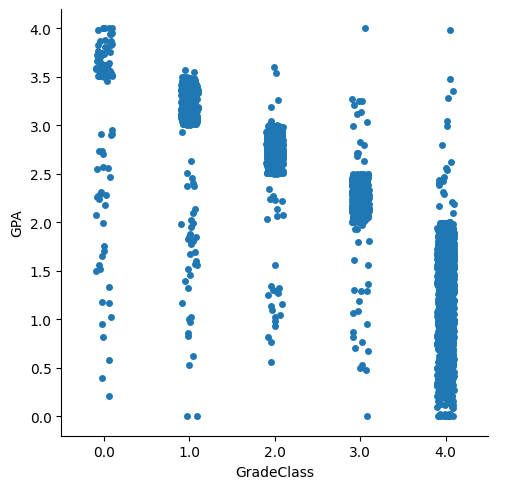

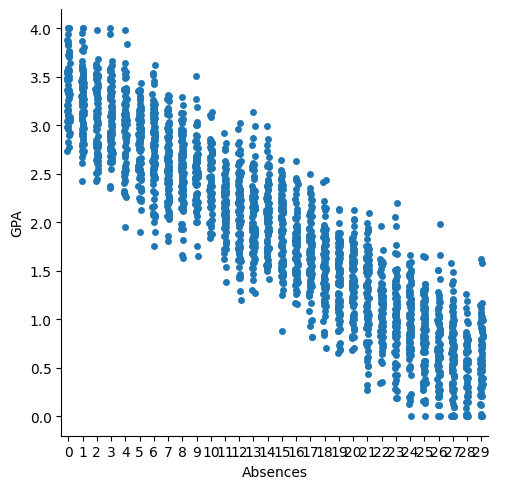

In [26]:
for target in df[['GradeClass','Absences']]:
  sns.catplot(data=df, x=target,y='GPA')

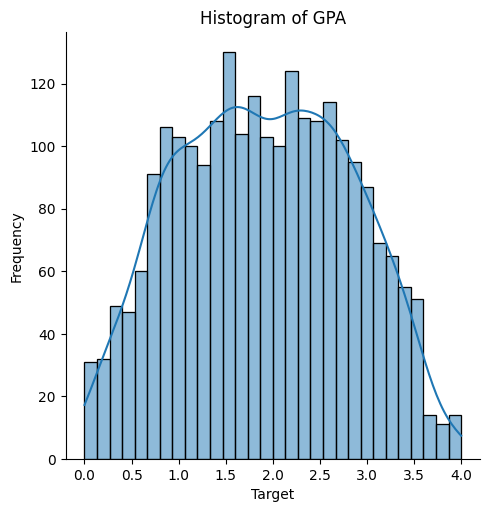

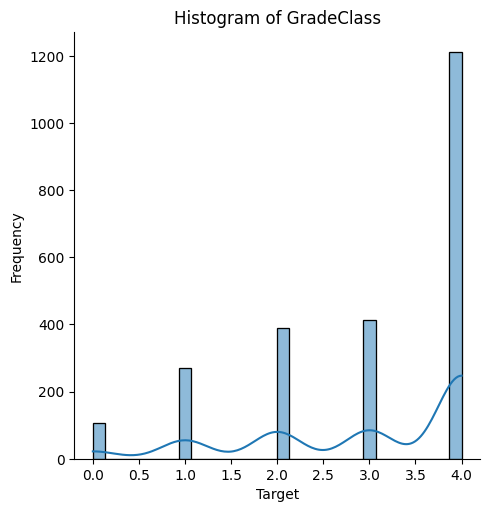

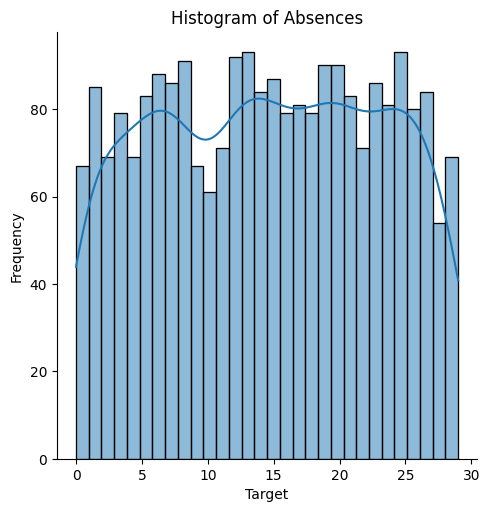

In [10]:
# Histogram
for v in selected_features:
  sns.displot(df[v], bins=30,kde=True)
  plt.xlabel('Target')
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {v}')
  plt.show()

conclusion :
* Gradeclass  **(NORMAL DISTRIBUTION)**
* GPA has most value is 1.5 with > 120 total data **(NEGATIVE SKEWNESS/ Left-Skewed)**
* Absences balance **(NORMAL DISTRIBUTION)**

In [11]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
x = pt.fit_transform(df[['GradeClass']])
# print(f"Skewness after Yeo-Johnson transformation: {dfs['variable_yeojohnson'].skew()}")

In [12]:
df['GradeClass']

0       2.0
1       1.0
2       4.0
3       3.0
4       4.0
       ... 
2387    0.0
2388    4.0
2389    2.0
2390    1.0
2391    1.0
Name: GradeClass, Length: 2392, dtype: float64

In [13]:
x

array([[-1.00047367],
       [-1.54973396],
       [ 0.89585447],
       ...,
       [-1.00047367],
       [-1.54973396],
       [-1.54973396]])